# K-Means Clustering
Phân cụm K-Means trên dữ liệu PCA30

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!pip install scikit-learn kneed

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

In [4]:
DATA_PATH = "/content/drive/MyDrive/Project_ML/"

df_pca = pd.read_csv(DATA_PATH + 'data_pca30.csv', index_col=0)
X_pca30 = df_pca.values
X_original = pd.read_csv(DATA_PATH + 'data.csv', index_col=0)

print(f"Data shape: {X_pca30.shape}")

Data shape: (801, 30)


## Tìm k tối ưu - Elbow Method

In [5]:
inertias = []
ks = range(1, 15)

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_original)
    inertias.append(km.inertia_)

knee = KneeLocator(ks, inertias, curve='convex', direction='decreasing').elbow
print(f"Optimal k: {knee}")

Optimal k: 5


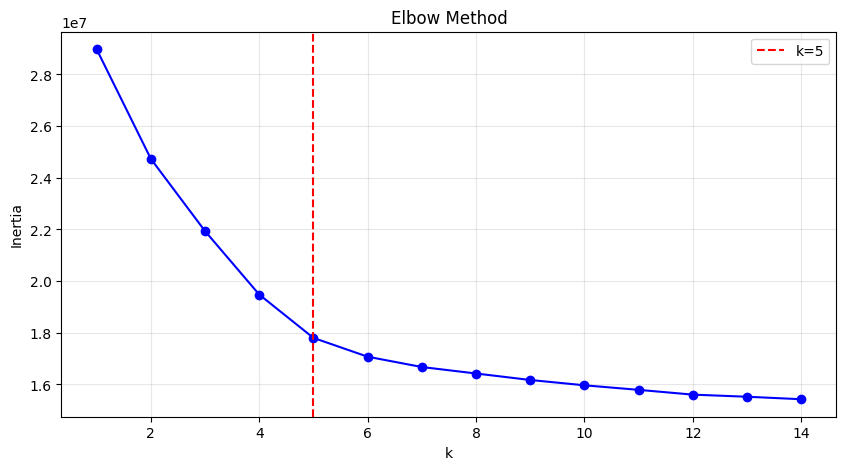

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(ks, inertias, 'bo-')
plt.axvline(x=knee, color='red', linestyle='--', label=f'k={knee}')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Train K-Means với k tối ưu

In [8]:
kmeans = KMeans(n_clusters=knee, random_state=2025, n_init=10)
labels_kmeans = kmeans.fit_predict(X_pca30)
sil_kmeans = silhouette_score(X_pca30, labels_kmeans)

print(f"K-Means Results:")
print(f"  k = {knee}")
print(f"  Silhouette Score = {sil_kmeans:.4f}")

unique, counts = np.unique(labels_kmeans, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples")

K-Means Results:
  k = 5
  Silhouette Score = 0.3699
  Cluster 0: 145 samples
  Cluster 1: 142 samples
  Cluster 2: 302 samples
  Cluster 3: 76 samples
  Cluster 4: 136 samples


## Lưu kết quả

In [9]:
df_labels = pd.DataFrame(labels_kmeans, index=df_pca.index, columns=['kmeans'])
df_labels.to_csv(DATA_PATH + 'kmeans_labels.csv')
print("Saved: kmeans_labels.csv")

Saved: kmeans_labels.csv


## Visualization

In [12]:
# ============================
# KẾT QUẢ K-MEANS CLUSTERING
# ============================

print("=" * 60)
print("KẾT QUẢ K-MEANS CLUSTERING")
print("=" * 60)

# --- Thông tin chính ---
print(f"\nSố cụm tối ưu (k) theo Elbow - KneeLocator: {knee}")
print(f"Silhouette Score: {sil_kmeans:.4f}")

# --- Phân bố các cụm ---
print(f"\nPhân bố các cụm:")
total_samples = len(labels_kmeans)

unique, counts = np.unique(labels_kmeans, return_counts=True)
for cluster, count in zip(unique, counts):
    percent = count / total_samples * 100
    print(f"   • Cluster {cluster}: {count} mẫu ({percent:.1f}%)")

# --- So sánh với nhãn thực (nếu tồn tại) ---
if 'y' in globals() and 'le' in globals():
    print(f"\nNhãn thực tế trong dữ liệu:")
    for cls in le.classes_:
        count = (y == cls).sum()
        percent = count / len(y) * 100
        print(f"   • {cls}: {count} mẫu ({percent:.1f}%)")

# --- Nhận xét tổng quan ---
print("\n" + "=" * 60)
print("NHẬN XÉT")
print("=" * 60)

print(f"- K-Means đã phân chia dữ liệu thành {knee} cụm dựa trên Elbow Method (KneeLocator).")

if sil_kmeans > 0.5:
    quality = "tốt"
elif sil_kmeans > 0.25:
    quality = "trung bình"
else:
    quality = "thấp"

print(f"- Silhouette Score = {sil_kmeans:.4f}, cho thấy chất lượng phân cụm ở mức {quality}.")

if 'le' in globals():
    print(
        f"- So sánh với {len(le.classes_)} nhãn thực tế, "
        f"clustering {'khá phù hợp' if knee == len(le.classes_) else 'có sự khác biệt'}."
    )

print("\nHoàn thành phân tích K-Means Clustering!")

KẾT QUẢ K-MEANS CLUSTERING

Số cụm tối ưu (k) theo Elbow - KneeLocator: 5
Silhouette Score: 0.3699

Phân bố các cụm:
   • Cluster 0: 145 mẫu (18.1%)
   • Cluster 1: 142 mẫu (17.7%)
   • Cluster 2: 302 mẫu (37.7%)
   • Cluster 3: 76 mẫu (9.5%)
   • Cluster 4: 136 mẫu (17.0%)

NHẬN XÉT
- K-Means đã phân chia dữ liệu thành 5 cụm dựa trên Elbow Method (KneeLocator).
- Silhouette Score = 0.3699, cho thấy chất lượng phân cụm ở mức trung bình.

Hoàn thành phân tích K-Means Clustering!


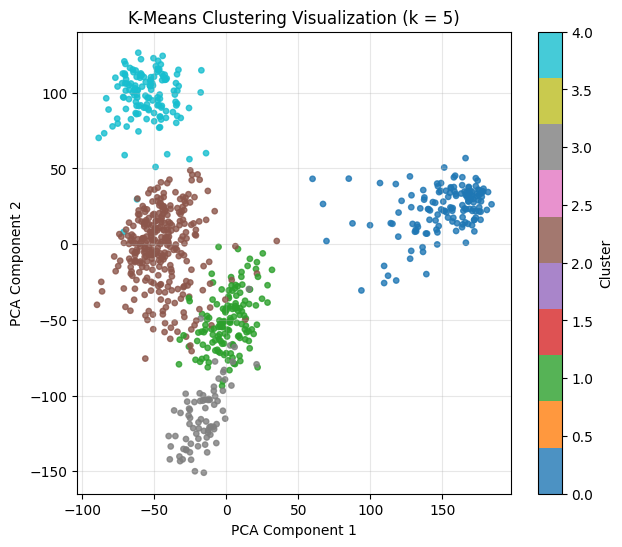

In [13]:
# ============================
# VISUALIZATION – KMEANS RESULT
# ============================

plt.figure(figsize=(7, 6))
plt.scatter(
    X_pca30[:, 0],
    X_pca30[:, 1],
    c=labels_kmeans,
    cmap='tab10',
    s=15,
    alpha=0.8
)
plt.title(f'K-Means Clustering Visualization (k = {knee})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()